In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim.lr_scheduler import CyclicLR
import torchvision.utils as vutils


from utils.loss import ContentLoss, AdversialLoss
from utils.transforms import get_default_transforms, get_no_aug_transform
from utils.datasets import get_dataloader
from utils.transforms import get_pair_transforms
from torch.utils.tensorboard import SummaryWriter
from models.discriminator import Discriminator
from models.generator import Generator

from datetime import datetime
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pickle
import os

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netD=Discriminator().to(device)
netG=Generator().to(device)

Save original tracked images for comparison.

Load previously trained networks.

In [11]:
netG.load_state_dict(torch.load("./checkpoints/trained_netG_original.pth"))
netD.load_state_dict(torch.load("./checkpoints/trained_netD_original.pth"))

<All keys matched successfully>

Load previous last epoch and iteration.

Save trained networks.

Save last epoch and iteration.

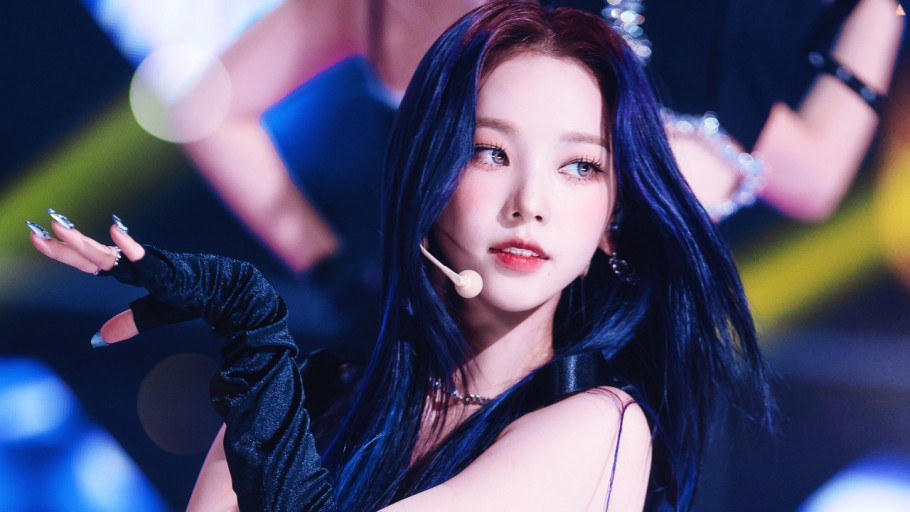

In [12]:
from PIL import Image
image = Image.open("C:/Users/user/Desktop/cartoon-gan-master/picture/karina.jfif")
image

In [13]:
trf = get_no_aug_transform()
image = trf(image)
image = image.unsqueeze(0).to(device)
netG.eval()
with torch.no_grad():
    pred_image = netG(image)
netG.train()
print()

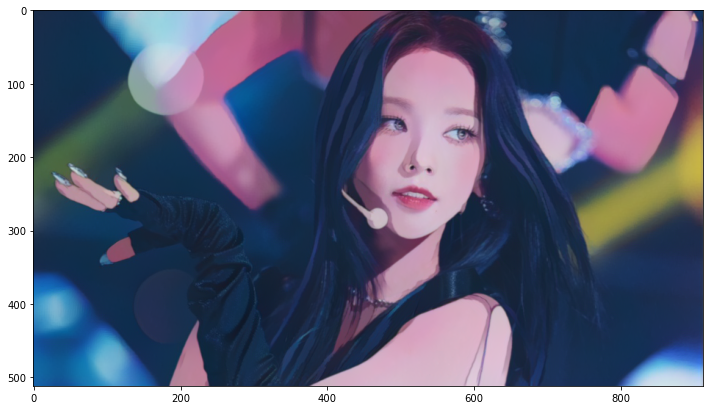

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(vutils.make_grid(pred_image.detach().cpu(), normalize=True).cpu(), (1, 2, 0)))

You can run the model on a folder of images using this function.

In [55]:
def test_image(path, file):
    image = Image.open(path + "/" + file).convert('RGB')
    name = file.split(".")[0]
    trf = get_no_aug_transform()
    image = trf(image)
    image = image.unsqueeze(0).to(device)
    netG.eval()
    with torch.no_grad():
        pred_image = netG(image)
    netG.train()
    img=np.transpose(vutils.make_grid(pred_image.detach().cpu(), normalize=True).cpu(), (1, 2, 0)).numpy()
    cv2.imwrite(f"./result/{name}.png", cv2.cvtColor(img*255, cv2.COLOR_RGB2BGR))

    
def test_image2(path, file):
    image = Image.open(path + "/" + file).convert('L')
    image_numpy = np.array(image)
    name = file.split(".")[0]
    trf = get_no_aug_transform()
    img=np.transpose(vutils.make_grid(pred_image.detach().cpu(), normalize=True).cpu(), (1, 2, 0)).numpy()
    cv2.imwrite(f"./bresult/{name}.png",image_numpy)


   

In [56]:
path1='C:/Users/User/Desktop/cartoon-gan-master/picture'
p=os.listdir(path1)[0].split(".")[0]
for file in os.listdir(path1):
    test_image(path1, file)



In [57]:
path2='C:/Users/User/Desktop/cartoon-gan-master/result'
for file in os.listdir(path2):
    test_image2(path2, file)